*Group Members*: 

- Nabil Arrouss (qup85ses) 
- Ahmad Pamir Sahak (las06weq) 
- Kohei Fujimura (koj66veq) 
- Heydar Bagloo ( yeq42hip) 

# Exercise Sheet 6
Please submit this notebook with your solutions exactly once per group via Ilias (team submission).

## Exercise 1: Kernelized Ridge Regression (2.5 Points)

Implement the Kernelized Ridge Regression to predict the continuous target variable `y` from the dataset `X`.

### Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

### Data loading

In [2]:
data = pd.read_csv('Housing.csv')
print(data.shape)
print(data.head())

(545, 13)
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


### Data Preprocessing

In [3]:
# Encode other categorical variables
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                    'airconditioning', 'prefarea', 'furnishingstatus']

# Use pd.get_dummies to encode categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Separate features and target
X = data_encoded.drop('price', axis=1)
y = data_encoded['price']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

### Ridge Regression with Kernels (2 Points)
1. Implement the kernel functions `linear_kernel`, `polynomial_kernel` and `rbf_kernel`.
2. Implement the `fit` and `predict` methods of the `KernelRidgeRegression` class.

In [5]:
def linear_kernel():
    def thunk(X, Y):
        """Compute the linear kernel between X and Y."""
        return X @ Y.T
    return thunk

def polynomial_kernel(degree=3, coef0=1):
    def thunk(X,Y):
        """Compute the polynomial kernel between X and Y."""
        return (X @ Y.T + coef0) ** degree
    return thunk

def rbf_kernel(gamma):
    def thunk(X, Y):
        """Compute the RBF (Gaussian) kernel between X and Y."""
        X_norm = np.sum(X**2, axis=1).reshape(-1, 1)
        Y_norm = np.sum(Y**2, axis=1).reshape(1, -1)
        dist = X_norm + Y_norm - 2 * (X @ Y.T)
        return np.exp(-gamma * dist)
    return thunk

# Updated Kernel Ridge Regression class
class KernelRidgeRegression:
    def __init__(self, kernel, l=1.0):
        """
        Initialize the Kernel Ridge Regression model.

        Parameters:
        - kernel: string, specifies the kernel type ('linear', 'polynomial', 'rbf')
        - alpha: float, regularization parameter
        - kernel_params: additional parameters for the kernel function
        """
        self.l = l
        self.kernel = kernel

    def fit(self, X, y):
        """
        Fit the Kernel Ridge Regression model using the derived formulas.

        Parameters:
        - X: array-like of shape (n_samples, n_features), training data
        - y: array-like of shape (n_samples,), target values
        """
        self.X_train = X
        self.y_train = y

        K = self.kernel(X, X)
        n = K.shape[0]

        self.alpha = np.linalg.solve(K + self.l * np.eye(n), y)

    def predict(self, X):
        """
        Predict using the Kernel Ridge Regression model.

        Parameters:
        - X: array-like of shape (n_samples, n_features), input data

        Returns:
        - y_pred: array-like of shape (n_samples,), predicted values
        """
        K_test = self.kernel(X, self.X_train)
        return K_test @ self.alpha

### Model Training and Evaluation (0.5 Points)
Implement the training of the Kernel Ridge Regression models with different kernels (linear, polynomial, RBF) on the training data.
Use appropriate hyperparameter searching techniques (e.g., grid search or cross-validation) to find the best hyperparameters for each kernel.
Evaluate the performance of each trained model on the test set using Mean Squared Error (MSE) and Mean Absolute Error (MAE). You can use the provided `evaluate_model` function for this purpose.

Also plot your results using the provided `plot_results` function.

In [6]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse:,.2f}, Mean Absolute Error: {mae:,.2f}")
    return mse

In [7]:
def plot_results(y_true, y_pred, model_name):
    plt.figure()
    plt.scatter(y_true, y_pred, alpha=0.7, edgecolors='purple')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title(f"Kernel Ridge Regression ({model_name})")
    plt.tight_layout()
    plt.show()

Linear - Mean Squared Error: 26,390,701,339,951.65, Mean Absolute Error: 4,964,271.36


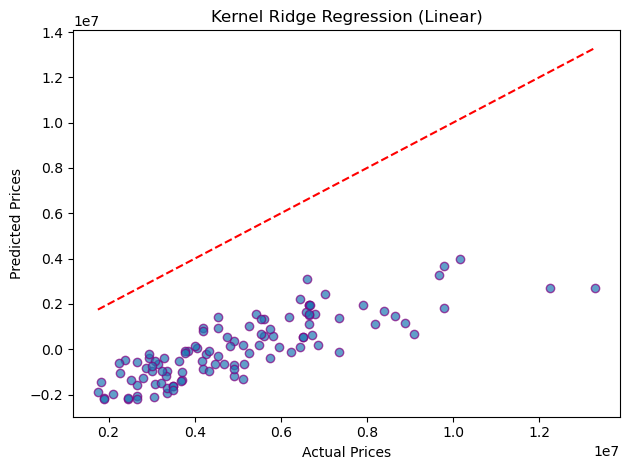

Polynomial - Mean Squared Error: 1,900,706,917,934.80, Mean Absolute Error: 1,032,759.80


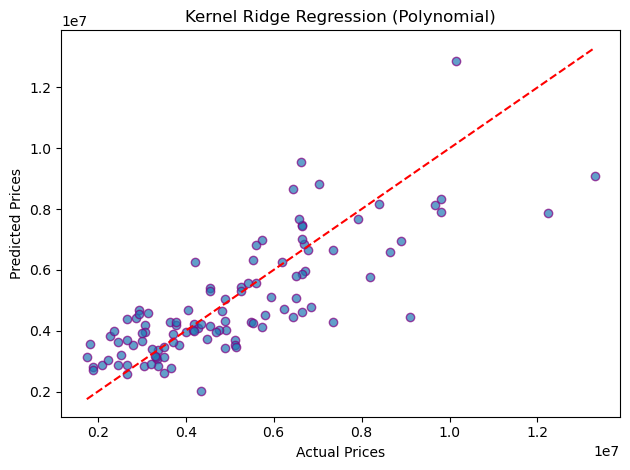

RBF - Mean Squared Error: 1,714,123,884,627.57, Mean Absolute Error: 960,119.30


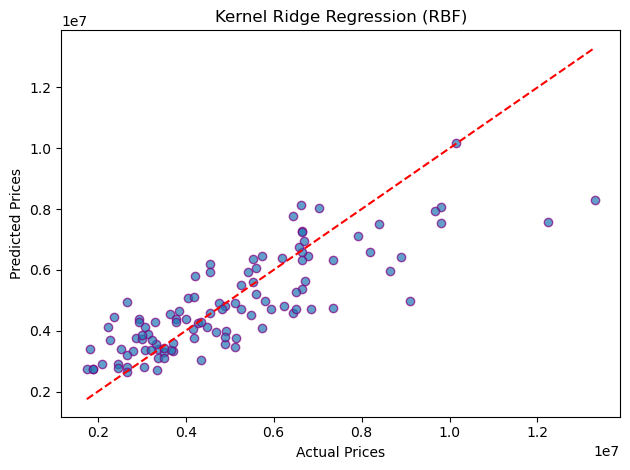

In [8]:
# to complete
# Linear kernel search
linear_k = linear_kernel()
best_l = None
best_mse = float("inf")

for l in [0.01, 0.1, 1, 10, 100]:
    model = KernelRidgeRegression(kernel=linear_k, l=l)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    if mse < best_mse:
        best_mse = mse
        best_l = l

model_lin = KernelRidgeRegression(kernel=linear_k, l=best_l)
model_lin.fit(X_train, y_train)
pred_lin = model_lin.predict(X_test)
evaluate_model(y_test, pred_lin, "Linear")
plot_results(y_test, pred_lin, "Linear")


# Polynomial kernel search
best_conf = None
best_mse = float("inf")

for degree in [2, 3, 4]:
    for coef0 in [0, 1, 2]:
        for l in [0.01, 0.1, 1, 10]:
            poly_k = polynomial_kernel(degree=degree, coef0=coef0)
            model = KernelRidgeRegression(kernel=poly_k, l=l)
            model.fit(X_train, y_train)
            preds = model.predict(X_test)
            mse = mean_squared_error(y_test, preds)
            if mse < best_mse:
                best_mse = mse
                best_conf = (degree, coef0, l)

degree, coef0, l = best_conf
poly_k = polynomial_kernel(degree=degree, coef0=coef0)
model_poly = KernelRidgeRegression(kernel=poly_k, l=l)
model_poly.fit(X_train, y_train)
pred_poly = model_poly.predict(X_test)
evaluate_model(y_test, pred_poly, "Polynomial")
plot_results(y_test, pred_poly, "Polynomial")


# RBF kernel search
best_conf = None
best_mse = float("inf")

for gamma in [0.0001, 0.001, 0.01, 0.1, 1]:
    for l in [0.01, 0.1, 1, 10]:
        rbf_k = rbf_kernel(gamma)
        model = KernelRidgeRegression(kernel=rbf_k, l=l)
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        mse = mean_squared_error(y_test, preds)
        if mse < best_mse:
            best_mse = mse
            best_conf = (gamma, l)

gamma, l = best_conf
rbf_k = rbf_kernel(gamma)
model_rbf = KernelRidgeRegression(kernel=rbf_k, l=l)
model_rbf.fit(X_train, y_train)
pred_rbf = model_rbf.predict(X_test)
evaluate_model(y_test, pred_rbf, "RBF")
plot_results(y_test, pred_rbf, "RBF")

## Exercise 2: Primal SVM (2.5 Points)

Implement the Primal SVM to classify the dataset `X` with the binary target variable `y`.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
%matplotlib inline

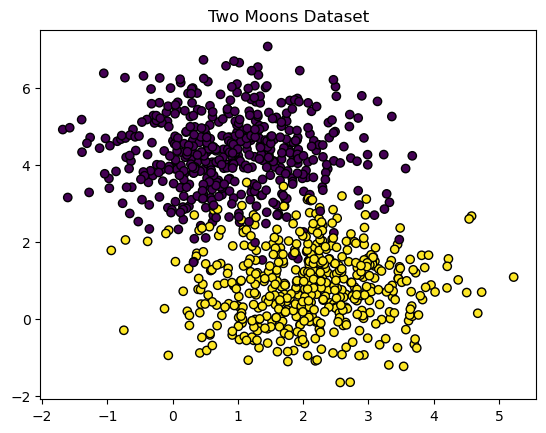

In [10]:
# Generate the two moons dataset
X, y = make_blobs(n_samples=1000, centers=2, random_state=0, cluster_std=1.0)
# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.title('Two Moons Dataset')
plt.show()


In [11]:
x_train=X[0:800,:]
y_train=y[0:800].astype(int)

x_val=X[800:900,:]
y_val=y[800:900].astype(int)

x_test=X[900:1000,:]
y_test=y[900:1000].astype(int)

### Implement the Primal linear SVM (2 Points)
1. Implement the `__init__`, `fit` and `predict` methods of the `SVM` class. Use the hinge loss with L2 regularization as the loss function.

In [12]:
class SVM:
    def __init__(self, C=1.0, lr=0.001, epochs=1000):
        self.C = C
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = 0

    def fit(self, X, y):
        y_bin = np.where(y == 0, -1, 1)
        n, d = X.shape
        self.w = np.zeros(d)

        for _ in range(self.epochs):
            for i in range(n):
                condition = y_bin[i] * (np.dot(self.w, X[i]) + self.b)

                if condition >= 1:
                    grad_w = self.w
                    grad_b = 0
                else:
                    grad_w = self.w - self.C * y_bin[i] * X[i]
                    grad_b = -self.C * y_bin[i]

                self.w -= self.lr * grad_w
                self.b -= self.lr * grad_b

    def predict(self, X):
        scores = X @ self.w + self.b
        return (scores > 0).astype(int)

def decision_boundary_draw(model, X, y, step=200):
    """
    Draw the decision boundary of the trained SVM model.
    
    Parameters:
    - model: Trained SVM instance (with model.predict method)
    - X: Input data array of shape (N, 2) for plotting (assuming 2D data).
    - y: Labels array of shape (N,)
    - step: Resolution of the grid for plotting.
    """
    # Determine the range for the grid
    x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
    y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
    
    # Create a mesh grid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, step),
                         np.linspace(y_min, y_max, step))
    
    # Flatten and combine so we can predict on the entire grid at once
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    
    # Predict for all points in the grid
    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(8,6))
    # Use contourf to visualize the regions
    plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)

    # Draw the boundary line 
    plt.contour(xx, yy, Z, levels=[0], colors='k', linewidths=2)

    # Plot original points
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

### Train and Evaluate (0.5 Points)
Train the SVM model on the training data and evaluate its accuracy on the test set. You can use the provided `accuracy_score` function for this purpose.

Test accuracy: 0.94


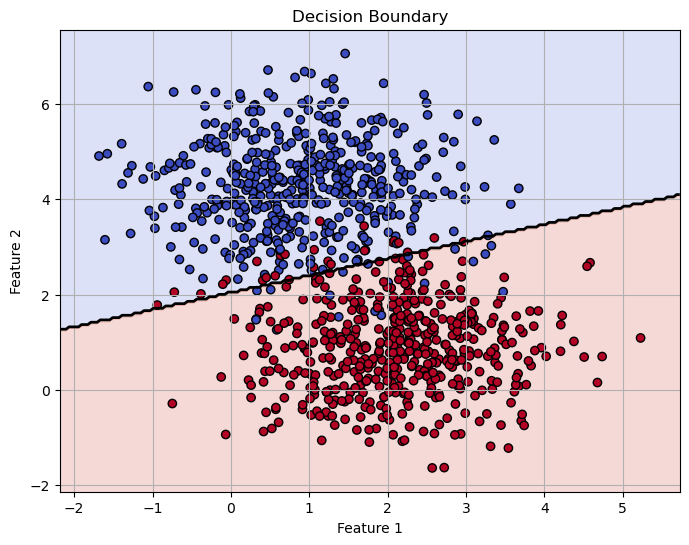

In [13]:
# Train and evaluate
model = SVM(C=1.0, lr=0.001, epochs=1000)
model.fit(x_train, y_train)

preds = model.predict(x_test)
print("Test accuracy:", accuracy_score(y_test, preds))

# Draw decision boundary 
decision_boundary_draw(model, X, y, step=200)